In [7]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import imageio as img

In [8]:

class Image:
    @staticmethod
    def open(path: str):
        pic = img.imread(path)
        return pic

    @staticmethod
    def convert_to_rgb(pic_sig: np.ndarray):
        red = pic_sig[:, :, 0]
        green = pic_sig[:, :, 1]
        blue = pic_sig[:, :, 2]
        return red, green, blue

    @staticmethod
    def show(im: np.ndarray, title="an image"):
        plt.imshow(im)
        plt.title(title)
        plt.show()
        
    @staticmethod
    def gray_show(gray: np.ndarray, title="an image"):
        plt.imshow(np.dstack([gray, gray, gray]))
        plt.title(title)
        plt.show()
        
    @staticmethod
    def rgb_show(r: np.ndarray, g: np.ndarray, b: np.ndarray, ):
        plt.imshow(np.dstack([r, g, b]))
        plt.show()


    @staticmethod
    def convolve(pic: np.ndarray, fil: np.ndarray):
        #return np.array(np.minimum(convolve(pic, fil), 255), dtype='uint8')

        return cv.filter2D(pic, -1, fil)
   

    @staticmethod
    def gray_scale(pic: np.ndarray):
        shape = np.shape(pic)
       
        grey = np.array([ [0 for i in range(shape[1])] for j in range(shape[0] )])

        for i in range(shape[0]):
            for j in range(shape[1]):
                grey[i][j] = pic[i][j][0] * 0.3 +  pic[i][j][1] * 0.59 + pic[i][j][2] * 0.11
        return grey.astype(np.uint8)

    


    @staticmethod
    def gausian_blur(pic, dim):
        if dim == 3:
            kernel = np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])
        elif dim == 5:
            kernel = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6],  [4, 16, 24, 16, 4],
                              [1, 4, 6, 4, 1]]) / 256
        return Image.convolve(pic, kernel)


    @staticmethod
    def horizontal_edge_detector(pic):
    
        kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
        return Image.convolve(pic, kernel)

    @staticmethod
    def vertical_edge_detector(pic):
        
        kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        return Image.convolve(pic, kernel)
    
    @staticmethod
    def edge_detector_1(pic):
        
        kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
        return Image.convolve(pic, kernel)
    @staticmethod
    def edge_detector_2(pic):
        
        kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
        return Image.convolve(pic, kernel)

    def edge_detector_3(pic):
        return Image.horizontal_edge_detector(pic) + Image.vertical_edge_detector(pic)
        

    




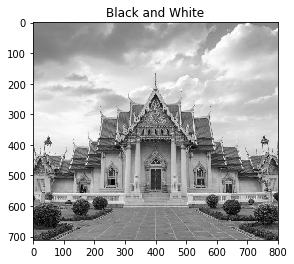

In [9]:
palace_image = Image.open("./PHW3.jpg")
#Image.show(image)
    
black_and_white = Image.gray_scale(palace_image)
Image.gray_show(black_and_white, "Black and White")
    

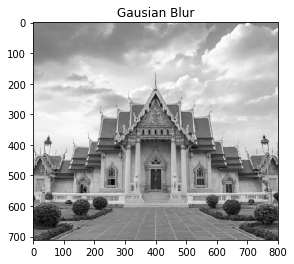

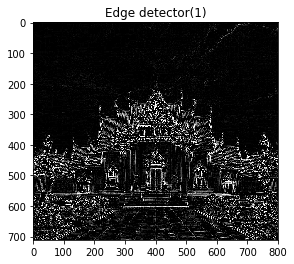

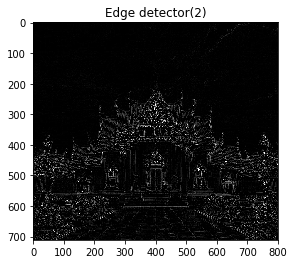

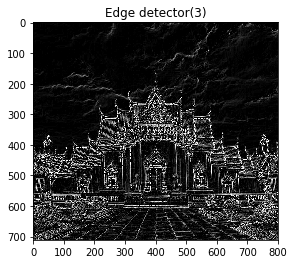

In [4]:
gausian_image = Image.gausian_blur(black_and_white, 5)
Image.gray_show(gausian_image, "Gausian Blur")

edge_detected = Image.edge_detector_1(black_and_white)
Image.gray_show(edge_detected, "Edge detector(1)")

edge_detected = Image.edge_detector_2(black_and_white)
Image.gray_show(edge_detected, "Edge detector(2)")


edge_detected = Image.edge_detector_3(black_and_white)
Image.gray_show(edge_detected, "Edge detector(3)")





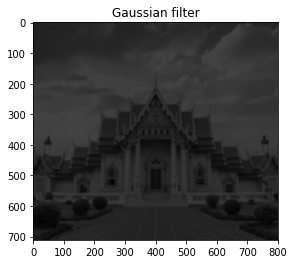

In [5]:
def GaussianBlurImage(size, sigma=5):
       
    gaussian_filter = np.zeros((size[0], size[1]), np.float32)
     
    m = size[0]//2
    n = size[1]//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi * (sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = x2/x1
  
    return Image.convolve(black_and_white, gaussian_filter)


gausian_image =  GaussianBlurImage([7, 7],  5)
Image.gray_show(gausian_image, "Gaussian filter")

Text(0, 0.5, 'std of original/gaussian')

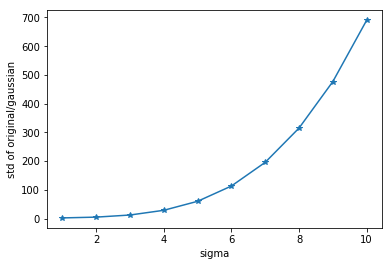

In [6]:
def average_variance(pic):
  
    variances = []
    times = 0
    
    
    for i in range(pic.shape[0] - 7):
        for j in range(pic.shape[1] - 7):
            times += 1
            
            variances.append(np.var(np.array(pic[i:i + 7, j : j + 7])))
            
    
   
    return np.mean(variances)  


original = average_variance(black_and_white)
averages = []
for i in range(10):
    averages.append([average_variance(GaussianBlurImage([7, 7], i + 1))])
averages = np.array(averages)   


plt.plot([i for i in range(1, 11)], original/averages,  marker='*')
plt.xlabel("sigma")
plt.ylabel("std of original/gaussian")
    



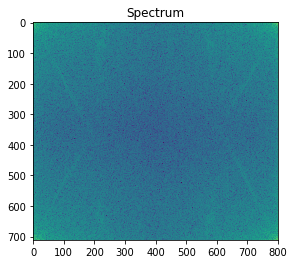

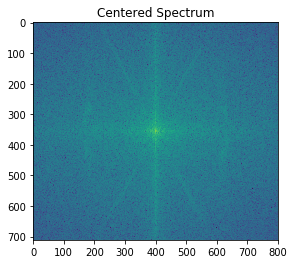

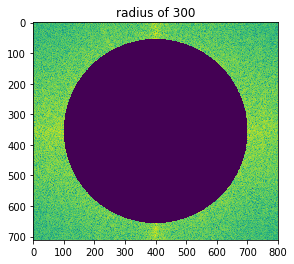

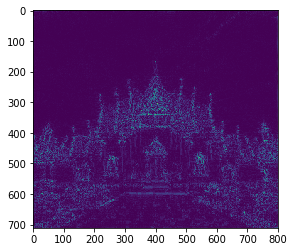

In [25]:
#2
import pylab

ftimage = np.fft.fft2(black_and_white)
plt.imshow(np.log(np.abs(ftimage)), ), plt.title("Spectrum")
plt.show()

#center the image
centered_ftimage = np.fft.fftshift(ftimage)

plt.imshow(np.log(1+np.abs(centered_ftimage)), ), plt.title("Centered Spectrum")
plt.show()

""" 
Set zero for frequency Center with Radius r
"""
r = 300
center = np.shape(centered_ftimage)
x, y = center[1] // 2, center[0] // 2
for i in range(len(ftimage)):
    for j in range(len(centered_ftimage[0])):
        if np.sqrt((i - y)**2 + (j - x)**2) <= r:
            centered_ftimage[i][j] = 0
plt.imshow(np.log(1+np.abs(centered_ftimage)), ), plt.title("radius of " + str(r))
plt.show()


""" 
Reverse Fourier Series 2D
"""
inversed_image = np.fft.ifft2(centered_ftimage)
pylab.imshow(np.abs(inversed_image))
pylab.show()